In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
import pandas as pd
random.seed(1)

np.random.seed(1)
tf.random.set_seed(1)

In [5]:
# Prepare MNIST data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Convert to float32.
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)
#x_train = x_train.astype('float32')
y_train, y_test = tf.cast(y_train, tf.int64), tf.cast(y_test, tf.int64)

num_classes = 10
num_features = x_train.shape[1] * x_train.shape[2]
# num_features = 28*28 =784
print(num_classes)
print(num_features)

# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = tf.reshape(x_train,[-1, num_features]), tf.reshape(x_test, [-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

10
784


In [8]:
mlp = Sequential()

mlp.add(tf.keras.Input(shape=(784,)))
#mlp.add(tf.keras.Input(shape=(28,28)))   
#mlp.add(layers.Flatten())
mlp.add(layers.Dense(128, activation = 'relu' )) 
mlp.add(layers.Dense(256, activation = 'relu' )) 
mlp.add(layers.Dense(10, activation ='softmax')) 

mlp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [10]:
mlp.compile(loss = 'sparse_categorical_crossentropy' , optimizer = tf.keras.optimizers.SGD(), metrics = ['accuracy'])


In [15]:
result =mlp.fit(x_train, y_train, batch_size =200, epochs = 20, validation_data = (x_test, y_test))
#batch_size를 고려하면 실제 크기는 200,28,28


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2156 - accuracy: 0.9387 - val_loss: 0.2097 - val_accuracy: 0.9413
Epoch 2/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2108 - accuracy: 0.9397 - val_loss: 0.2047 - val_accuracy: 0.9418
Epoch 3/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2062 - accuracy: 0.9419 - val_loss: 0.2014 - val_accuracy: 0.9422
Epoch 4/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2017 - accuracy: 0.9429 - val_loss: 0.1964 - val_accuracy: 0.9430
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1977 - accuracy: 0.9441 - val_loss: 0.1927 - val_accuracy: 0.9445
Epoch 6/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1935 - accuracy: 0.9451 - val_loss: 0.1888 - val_accuracy: 0.9458
Epoch 7/20
60000/60000 [==============================] 

In [16]:
mlp.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.15245183177143334, 0.9562]

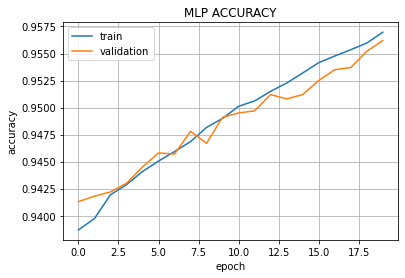

In [17]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('MLP ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')